# [George McNinch](http://gmcninch.math.tufts.edu) Math 87 - Spring 2024

# § Week 1.3

# Optimization & derivatives of functions

# Using code to calculate derivatives

In our discussion of the `oil spill` problem, you may have been disappointed to have to do calculations with paper-and-pencil.

There are two possible ways around this, which I'd like to discuss briefly (with examples).

- We can use software for symbolic calculation of derivatives.

- Alternatively, we can *numerically approximate* derivatives. 

This `notebook` will discuss these possibilities. For each method, we first treat some simple examples, and then we apply the method to the `oil spill` problem.

# Symbolic calculations

First, let's investige how `python` can make symbolic calculations using the `sympy` package.


For more details about symbolic calculations in python consult the [symbolic
mathematics package](https://www.sympy.org/en/index.html).



## A simple example

Let's find and classify the critical points for the cubic polynomial

$$G(t) = t^3 - 4t^2 - 5t - 2.$$

Let's import the `sympy` package, and declare `tt` to be a *symbol*:

In [62]:
import sympy as sp
sp.init_printing()

tt = sp.Symbol('t') 

We now define the function $G$, and we create a corresponding *symbolic* version of $G$ by evaluating the function $G$ at the symbol `tt`.

In [63]:
def G(t): return t**3 - 4*t**2 - 5*t - 2
    
Gs = G(tt)
Gs

Now we symbolically find the first and second derivative of $G$, using
the function `diff` from the `sympy` package:

In [129]:
DGs = sp.diff(Gs,tt)           # first derivative
DDGs = sp.diff(DGs,tt)         # second derivative

For example, we can see the first derivative:

In [66]:
DGs

Now we use the `sympy` solver to find the critical points of $G$ - i.e the solutions of the equation `DGs == 0`

In [169]:
crits = sp.solve(DGs,tt)
crits

In [173]:
list(map(lambda c: c.evalf(),crits))
list(map(evalf,crits))

NameError: name 'evalf' is not defined

Using the fuction `lambdify`, we make an actual function `DDG` out of the symbolic expression `DDGs` and apply this function to each critical point:

In [60]:
DDG = sp.lambdify(tt,DDGs)
list(map(DDG,crits))

Since the value of `DDG` is *negative* at the first critical point, we see that $G$ has a local max at $t=\dfrac{4}{3} - \dfrac{\sqrt{31}}{3}$.

Similarly, $G$ has a local min at $t=\dfrac{4}{3} +\dfrac{\sqrt{31}}{3}$.

We confirm this with a sketch of the graph of $G$:

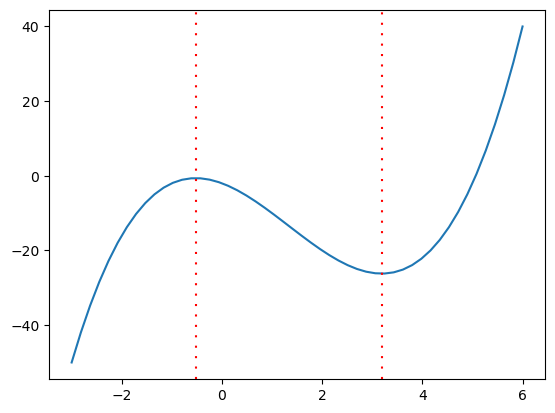

In [65]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(-3,6)

fig, ax = plt.subplots()  
ax.plot(t,G(t),label="G")

for t in crits:
        ax.axvline(x=t, color="red", dashes=[1,4])


## A trig example

Let $H1(t) = \sin(5t)$ and $H2(t) = \sin(5t + 3\pi/8)$. Let's classify the critical points of $H1(t)$ and $H2(t)$ on the interval $[-\pi,\pi]$.

This time, we use the `sin` function from the `sympy` library.

In [116]:
import sympy as sp
sp.init_printing()

tt = sp.Symbol('t') 

H1s = sp.sin(5*tt)

H2s = sp.sin(5*tt + 3*sp.S.Pi/8)

In [117]:
DH1s = sp.diff(H1s)
DH1s

In [118]:
DH2s = sp.diff(H2s)
DH2s

In [119]:
DDH1s = sp.diff(DH1s)
DDH1s

In [120]:
DDH2s = sp.diff(DH2s)
DDH2s

Now, we want to find the critical points in the interval $[-\pi,\pi]$. For this, we first
define this `interval` and use the `solveset` function to find the solutions to `DHs==0` on this interval:

In [145]:
int = sp.sets.sets.Interval(-np.pi,np.pi)

crits1 = sp.solveset(DH1s,tt,domain=int)
list(crits1)

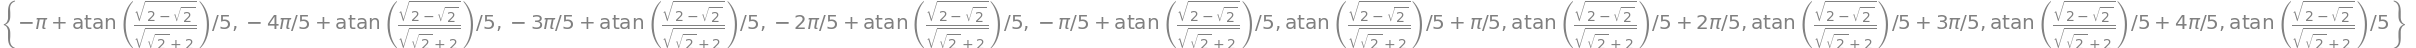

In [149]:
crits2 = sp.solveset(DH2s,tt,domain=int)
crits2

We now use the second derivative test to classify the critical points as a (local) `min` or `max`

In [157]:
def classify(DD,cp): 
    if DD.subs(tt,cp)>0:
        return "min"
    elif DD.subs(tt,cp)<0:
        return "max"
    else: return "inconclusive"

list(map(lambda x: (x,classify(DDH1s,x)),crits1.evalf()))


[(-2.82743338823081, 'min'),
 (-2.19911485751286, 'max'),
 (-1.57079632679490, 'min'),
 (-0.942477796076938, 'max'),
 (-0.314159265358979, 'min'),
 (0.314159265358979, 'max'),
 (0.942477796076938, 'min'),
 (1.57079632679490, 'max'),
 (2.19911485751286, 'min'),
 (2.82743338823081, 'max')]

In [158]:
results = list(map(lambda x: (x,classify(DDH2s,x)),crits2.evalf()))
results

[(-3.06305283725005, 'min'),
 (-2.43473430653209, 'max'),
 (-1.80641577581413, 'min'),
 (-1.17809724509617, 'max'),
 (-0.549778714378214, 'min'),
 (0.0785398163397448, 'max'),
 (0.706858347057703, 'min'),
 (1.33517687777566, 'max'),
 (1.96349540849362, 'min'),
 (2.59181393921158, 'max')]

Let's confirm our classification using graphs:

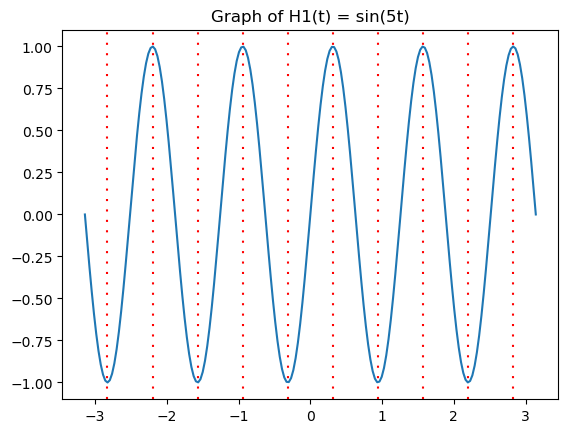

In [160]:
import matplotlib.pyplot as plt
import numpy as np

tl = np.linspace(-np.pi,np.pi,200)

def H1(t): return np.sin(5*t)
def H2(t): return np.sin(5*t + 3*np.pi/8)

fig, ax = plt.subplots()  
ax.set_title("Graph of H1(t) = sin(5t)")
ax.plot(tl,H1(tl),label="H1")

for t in crits1:
        ax.axvline(x=t, color="red", dashes=[1,4])

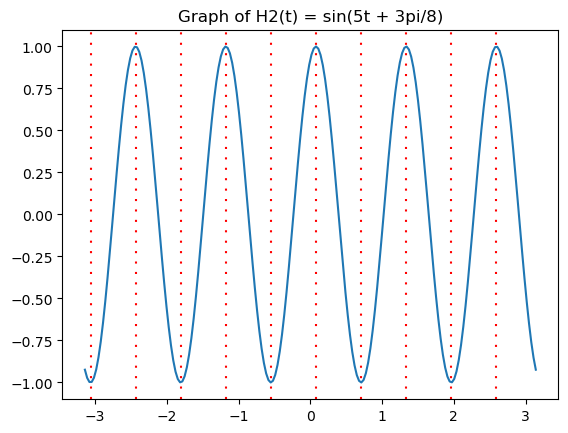

In [162]:
fig, ax = plt.subplots()  
ax.plot(tl,H2(tl),label="H2")
ax.set_title("Graph of H2(t) = sin(5t + 3pi/8)")

for t in crits2:
        ax.axvline(x=t, color="red", dashes=[1,4])


## Return to the "oil spill" problem

Recall the `python` expressions for the main function of interest:

-   \$C\_{tot}(n) \$ `c.cost(n)`

We will make a “symbolic variable” we’ll call `y`.

We would like to make a symbolic version the `python` function
`c.cost(n)` by valuation at `n=y`.

Unfortunately, our definition of `c.cost(n)` involved a test of
inequality (to decide whether the fine calculation applied). But it is
not “legal” to test inequalities with the symbol `y`. (More precisely,
such tests can’t be sensibly interpreted).

For small enough $n$, `c.cost(n)` is equal to
`c.crew_costs(n) + c.fine_per_day * (c.time(n)-14)`. And this latter
expression *can* be evaluated at the symbolic variable `y`.

And *sympy* permits us to symbolically differentiate the resulting
expression:

In the next cell, we load the *definitions* from the `oil spill` notebook.

In [2]:
%%capture

%run week01-02--optimization.ipynb import *


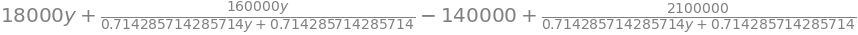

In [163]:

import sympy as sp
sp.init_printing()

c = OilSpillCleanup()

y = sp.Symbol('y')    # symbolic variable

def lcost(n):
    return c.crew_costs(n) + c.fine_per_day * (c.time(n) - 14)

lcost_symb = lcost(y)
D_lcost_symb = sp.diff(lcost_symb,y)  # first derivative, for n<19
DD_lcost_symb = sp.diff(D_lcost_symb,y) # second derivative, for n<19

lcost_symb

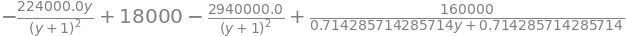

In [6]:
D_lcost_symb

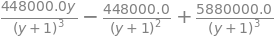

In [7]:
DD_lcost_symb

Now e.g. `sympy` solvers are able to find the critical point for the
symbolic derivative `D_lcost_symb`, as follows:


In [13]:
crits = sp.solve(D_lcost_symb,y)
print(crits)

[-13.2836838484589, 11.2836838484589]


Notice that the value of the second derivative at the positive critical point $11.28$ is positive:


In [15]:
DD_lcost = sp.lambdify(y,DD_lcost_symb)

DD_lcost(crits[1])>0


This the second derivative test shows that our postive critical point of 11.28 determines a *local minimum* for the cost function; this is the conclusion we came to previously.

Note that this symbolic method doesn't completely solve the problem: we still require analysis
about the interval $19 < n$ (where the cost function isn’t modeled by our symbolic function `lcost_symb`).

# Numerical calculations

In [3]:
import numpy as np


In [166]:

def crit_pts(ff,xx,tol=1E-5):
    gg = np.gradient(ff,xx)
    res = [ x for (x,g) in zip(xx,gg)
            if np.abs(g)<tol ]
    return res

def crit_pts_fun(f,a,b,n,tol=1E-5):
    xx=np.arange(a,b,1/n)
    ff=f(xx)
    return crit_pts(ff,xx,tol)

#s=crit_pts_fun(np.sin,-np.pi,np.pi,1E5)

#c=crit_pts_fun(cubic,0,4,1E5)

#print(f"sin - critical points: {s}")
#print(f"cubic - critical points: {c}")

In [167]:
def G(t): return t**3 - 4*t**2 - 5*t - 2

crit_pts_fun(G,-2,6,5E3,tol=1E-3)

In [62]:
def H(t): return np.sin(5*t) 

crit_pts_fun(H,-np.pi,np.pi,1E4,tol=1E-3)

[-2.199092653587804,
 -1.5707926535864782,
 -0.9424926535851523,
 -0.3141926535838264,
 0.9425073464188252,
 1.5708073464201515,
 2.199107346421478,
 2.8274073464228033]

In [4]:
%%capture

%run week01-02--optimization.ipynb import *

In [81]:
c = OilSpillCleanup()

f = np.vectorize(c.cost)

res=crit_pts_fun(f,0,19,1E5,1.5E-2)
res

[11.28368]